# **Introduction to Supervised Learning**

## __Agenda__

In this lesson, we will cover the following concepts with the help of examples:

*   Introduction to Supervised Learning
*   Supervised Learning Algorithms
*   Classification
*   Regression
*   Applications of Supervised Learning
*   Overfitting and Underfitting


## __Introduction to Supervised Learning__

Supervised learning is a type of machine learning where the algorithm learns from labeled data. In supervised learning, the algorithm is provided with a dataset containing input-output pairs, where each input is associated with a corresponding output.

# 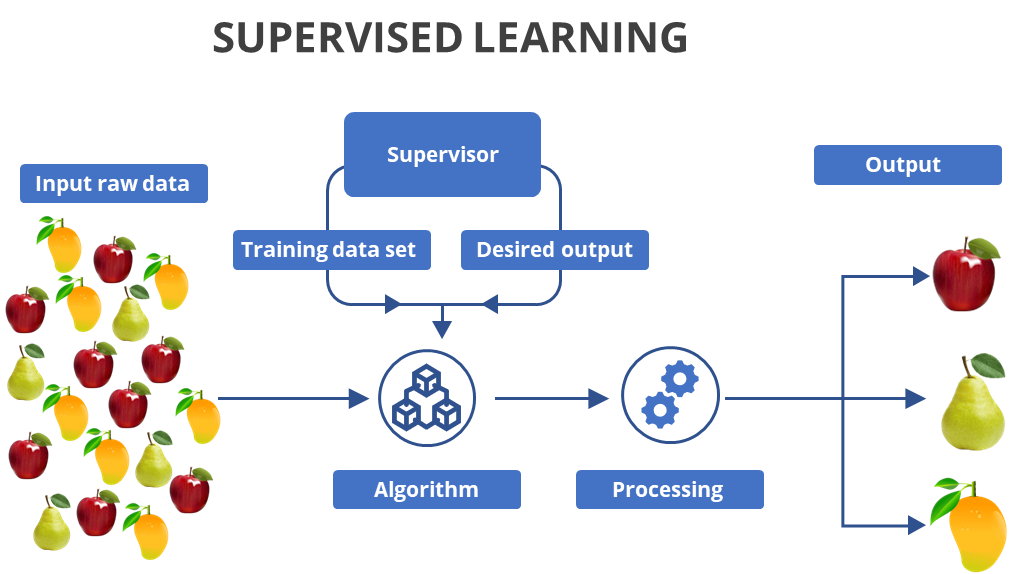_

####__Working of a Machine Learning Model__####

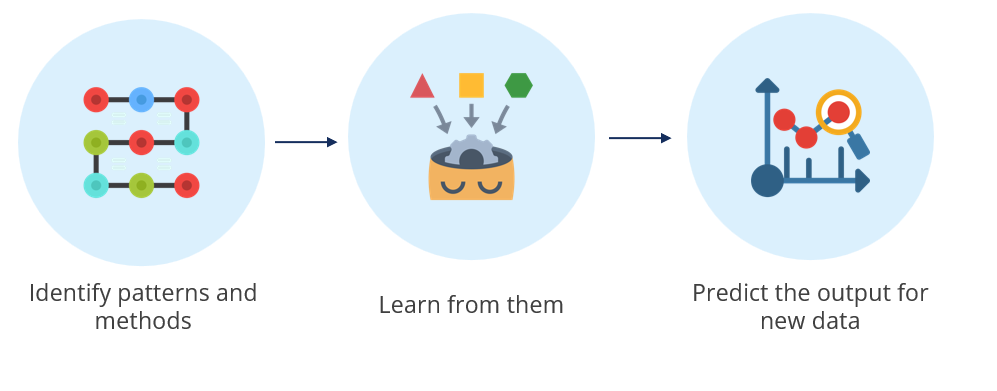

### Supervised machine learning algorithms include:
- Linear and Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine

Here is an industrial illustration of a model to determine if an incident is a fire incident:

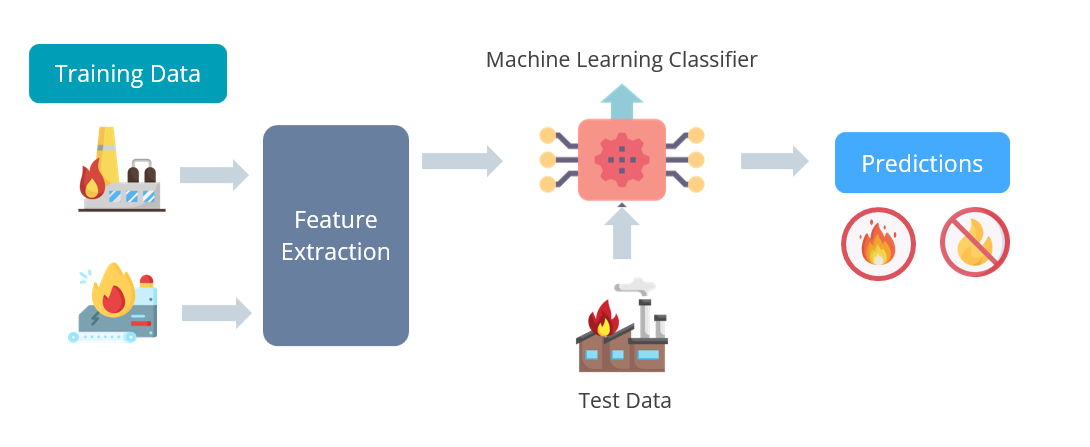

The data used to train a classification model for detecting fire incidents includes:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Picture5.png)

The output data is binary. (1: fire incident, 0: no fire incident)

The training data helps:
- Eliminate false positives, like a cooking fire or campfire being misunderstood as a fire incident.
- Classify the levels of fire incidents.
- The fire department recognizes and classifies real-life situations and dispatches sufficient resources.

The testing data needed to create a classification model for fire incident detection includes the following:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Picture5.png)

### __Preparing and Shaping Data__

In this topic, we will discuss how to prepare the data and ensure its shape.



#### Step 1: Import Required Libraries

- Import pandas and NumPy libraries.

In [ ]:
import pandas as pd
import numpy as np

#### Step 2: Load the Dataset

- Load the **titanic** dataset and display the first few rows.
- Return a description of the dataset using the describe() method.


In [ ]:
df = pd.read_csv('titanic.csv', sep= ',')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


__Observations:__

- The mean and median are not applicable for **PassengerId**.
- 29 is the mean age, and 80 is the maximum age.
- Similarly, 32 is the mean, and 512 is the max for **Fare**.

- Now, let's look into the data types using **df.info** or dtypes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


__Observation:__
- Here, both non-null counts as well as the data type are printed.




#### Step 3: Perform Data Preprocessing

- Let's club siblings with spouses and parents with child tickets together.
- Create a feature called __Travelalone__ that represents the # of passengers traveling solo.
- The feature is computed by taking the sum of values for the variables SibSp (siblings and spouses) and parch (parents and children) for a particular instance, and checking if the sum is 0 or greater than 0.
- The value 0 suggests that the passenger is traveling alone, and 1 indicates otherwise.

In [ ]:
df['Travelalone'] =  np.where((df['SibSp'] + df['Parch']) > 0, 0 , 1).astype('uint8')

**Observation:**
- Now that
a **Travelalone** attribute is created, let's drop the unnecessary data columns and check if there are any missing values.

In [ ]:
df1 = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis =1)

In [ ]:
df1.isna().sum()

Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
Embarked         2
Travelalone      0
dtype: int64

__Observation:__
- Age and Embarked feature has missing values, but here we are ignoring embarked as the missing value is negligible.


In [ ]:
df1['Age'] = df1['Age'].fillna(df1['Age'].median())

Missing values for Age are replaced with the median.

In [ ]:
df1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Travelalone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


__Observation:__

- There are categorical variables like **Sex** and **Embarked**.

In [ ]:
df_titantic = pd.get_dummies(df1, columns= ['Pclass', 'Embarked', 'Sex'],drop_first= True, dtype=int)

In [ ]:
df_titantic.head()

,Survived,Age,Fare,Travelalone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,1,0,1,1
1,1,38.0,71.2833,0,0,0,0,0,0
2,1,26.0,7.9250,1,0,1,0,1,0
3,1,35.0,53.1000,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,1,0,1,1


__Observation:__

- Hence, dummy values are created.

#### Step 4: Prepare Features and Target Variables

- Let us preprocess the data and create a scaler to standardize the data points.

- Assign x and y values, with x being a dataframe with feature variables and y being the target variable, which is survived.

In [ ]:
X = df_titantic.drop(['Survived'], axis =1)
y = df_titantic['Survived']

- Now, let's import the **MinMaxScaler** and **StandardScaler** to rescale the dataset.
- A **min-max scaler** is a normalization technique that scales and translates features to a specified range, often between 0 and 1.
- A **standard scaler** is a normalization technique that scales features to have a mean of 0 and a standard deviation of 1.
- Transpose that and call it **MM** or **MinMaxScaler**.
- The formula for MinMaxScaler is X(scaled) = (X - X(min)) / (X(max) - X(min)).
- Fit  MinMaxScaler and Transform the feature dataframe, X.
- Print the dataframe


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
trans_MM = MinMaxScaler()
trans_SS = StandardScaler()

In [ ]:
df_MM = trans_MM.fit_transform(X)
pd.DataFrame(df_MM)

,0,1,2,3,4,5,6,7
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,1.0
1,0.472229,0.139136,0.0,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.015469,1.0,0.0,1.0,0.0,1.0,0.0
3,0.434531,0.103644,0.0,0.0,0.0,0.0,1.0,0.0
4,0.434531,0.015713,1.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
886,0.334004,0.025374,1.0,1.0,0.0,0.0,1.0,1.0
887,0.233476,0.058556,1.0,0.0,0.0,0.0,1.0,0.0
888,0.346569,0.045771,0.0,0.0,1.0,0.0,1.0,0.0
889,0.321438,0.058556,1.0,0.0,0.0,0.0,0.0,1.0


__Observations:__

- The values of **Age** and **Fare** have been rescaled to fit within the range of 0 to 1.

- Some of the attributes are also in the range of 0 to 1.

- MinMaxScaler will be using the X values. For example, one value is equal to X minus Xmin divided by Xmax by Xmin.                                                           


- The formula for the standard scaler is z= (x−μ)/σ.
​
- Now, let's check the same for StandardScaler and see how the data varies.

In [ ]:
df_SS = trans_SS.fit_transform(X)
pd.DataFrame(df_SS)


,0,1,2,3,4,5,6,7
0,-0.565736,-0.502445,-1.231645,-0.510152,0.902587,-0.307562,0.619306,0.737695
1,0.663861,0.786845,-1.231645,-0.510152,-1.107926,-0.307562,-1.614710,-1.355574
2,-0.258337,-0.488854,0.811922,-0.510152,0.902587,-0.307562,0.619306,-1.355574
3,0.433312,0.420730,-1.231645,-0.510152,-1.107926,-0.307562,0.619306,-1.355574
4,0.433312,-0.486337,0.811922,-0.510152,0.902587,-0.307562,0.619306,0.737695
...,...,...,...,...,...,...,...,...
886,-0.181487,-0.386671,0.811922,1.960202,-1.107926,-0.307562,0.619306,0.737695
887,-0.796286,-0.044381,0.811922,-0.510152,-1.107926,-0.307562,0.619306,-1.355574
888,-0.104637,-0.176263,-1.231645,-0.510152,0.902587,-0.307562,0.619306,-1.355574
889,-0.258337,-0.044381,0.811922,-0.510152,-1.107926,-0.307562,-1.614710,0.737695


__Observations:__

- For Standardscaler Transformation, the data are transformed to have a mean of 0 and a standard deviation of 1.

- It always depends on the case whether you want to consider
MinMaxScalar or Standardscalar.

So, this is how you prepare the data, cleanse the data, and, if required,
preprocess the data.


## __Supervised Learning Algorithms__

There are two types of Supervised Learning Algorithms:
- Classification
- Regression

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Picture1.png)

### __Classification__

The classification algorithm is a supervised learning technique to identify the category of new observations based on the training data.

Example: To segregate the emails into spam, the model first examines the data to understand the patterns and methods and then classifies the new emails as spam.

### __Regression__

The regression algorithm is a supervised learning technique to predict continuous values.

Example: A regression algorithm predicts the car's price based on features like car size, brand, and mileage.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Picture3.png)

### __Applications of Supervised Learning__



Supervised Learning can optimize and automate processes across industries.
It enhances decision-making, reduces manual effort, and enables more accurate predictions.

1. HR operations: It finds the right candidates for job vacancies. Supervised learning can help a machine shortlist resumes based on accepted or rejected candidate profiles, improving its ability to recommend similar profiles in the future.

2. Finance: It segregates good and bad loans. Supervised learning can automate loan approval and improve loan risk assessment by using historical loan data to train a model.

3. Emails: Supervised learning utilizes labeled examples of spam and non-spam emails to train machine learning models. This enables the models to predict whether new, unseen emails are spam.

4. Manufacturing: Supervised learning is used in production and manufacturing in engineering to inspect quality and classify manufactured products into grades.

5. Maritime Industry: Forecasting is done based on a combination of historical events and weather conditions, which helps develop precautionary incident management. A regression model developed with supervised learning can use past data to predict tidal currents. It can also forecast demand and supply based on past consumer records, thus reducing inventory losses.

6. Fraud Protection: Supervised learning models help detect and prevent fraud. To predict fraud, the model learns from data such as:
- Fraudulent activities in financial transactions
- Cyber attacks on servers
- Fake social media profiles


### __Overfitting and Underfitting__

Overfitting and underfitting define how well machine learning models are learning and applying what they learn.

#### __Bias__

It refers to the error introduced by approximating a real-world problem, which may be complex with a simplified model.

High bias means that there is a big difference between the actual and predicted values.
Low bias indicates that the difference between the actual and predicted values is low.


#### __Variance__

It refers to the model's sensitivity to small fluctuations or noise in the training data.

A high variance indicates more scattered data. A low variance indicates less scattered data.


#### __Bias-Variance Tradeoff__

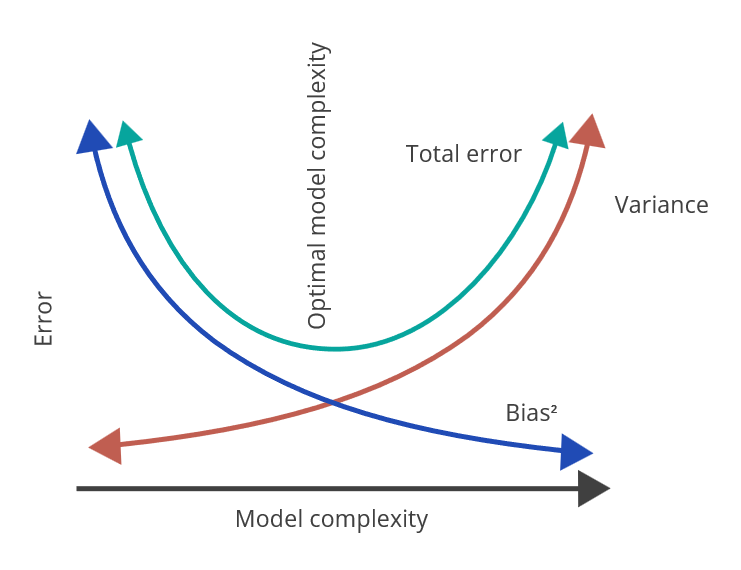

#### __Overfitting__

The data is overfitted when there is low bias and high variance.
Overfitting happens when a model focuses on the details in the training data set, which negatively impacts the performance of the model on a new data set.






Example: If you train a machine learning model that predicts climate change to consider only -2°F as a cold temperature, it is an overfit, and the model will not consider any other temperature as cold and will not make accurate predictions.

#### __Underfitting__

The data is underfitted when there is high bias and low variance. Underfitting is easily detectable, as it will exhibit poor performance even on the training data set.

If a model to predict climate change is trained with limited features like temperature and wind speed, it is an underfit. If the model encounters other climate conditions, like rain or snow, it won't be able to detect patterns.

- If a model performs well on training data as well as on testing data, it is a good model.
- If the model performs well with training data but not with testing data, it is an overfit.
- If the model does not perform well on both training data and testing data, it is an underfit.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Picture2.png)

### __Detecting and Preventing: Overfitting and Underfitting__

### Step 1: Import the Required Libraries
- Import all necessary libraries for data manipulation, model creation, evaluation, and visualization.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

#### Step 2: Generate and Split the Dataset
- Use __make_classification__ to generate a synthetic dataset. Next, split this dataset into training and testing sets.

In [ ]:
# Generate a synthetic dataset
X, y = make_classification(n_samples=9000, n_features=18, n_informative=4, n_redundant=12, random_state=2)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


#### Step 3: Evaluate Model Performance at Various Depths
- Evaluate how the Decision Tree classifier performs at different depths to understand how depth affects overfitting and underfitting.

In [ ]:
# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
depths = list(range(1, 21))
cv_scores = []

# Loop through various depths
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    cv_scores.append(scores.mean())

#### Step 4: Identify the Optimal Model Complexity
- Determine the tree depth that yields the best balance between training and testing performance, indicating that it neither overfits nor underfits significantly.

In [ ]:
best_depth = depths[np.argmax(cv_scores)]
print(f"Best depth based on cross-validation: {best_depth}")

Best depth based on cross-validation: 9


#### Step 5: Train and Evaluate the Optimal Model
- Train a decision tree classifier using the best depth found from cross-validation and evaluate its performance on both the training and testing sets.

In [ ]:
model = DecisionTreeClassifier(max_depth=best_depth)
model.fit(X_train, y_train)

train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f'Training Accuracy: {train_accuracy:.3f}')
print(f'Testing Accuracy: {test_accuracy:.3f}')

Training Accuracy: 0.936
Testing Accuracy: 0.864


#### Step 6: Visualize Training vs. Testing Accuracy
- Create a bar plot to visually compare the accuracy of the model on the training set versus the testing set to help illustrate the model's generalization capability.

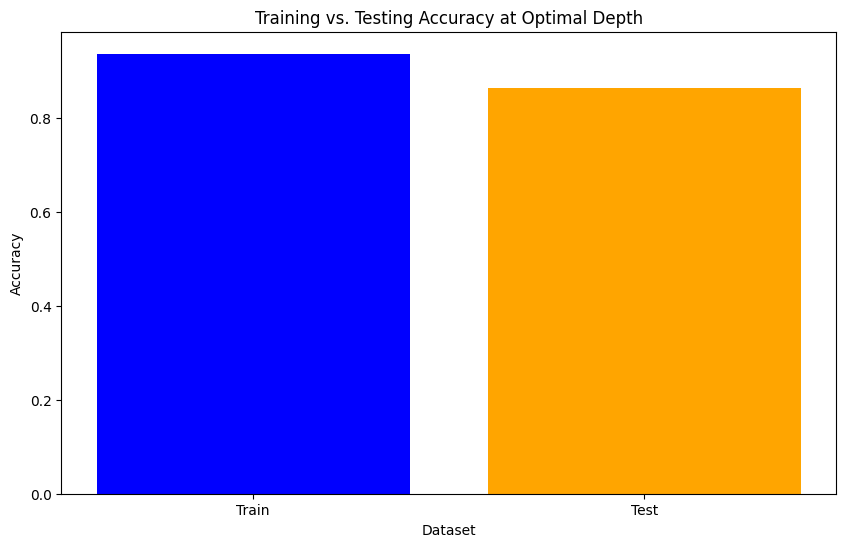

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(['Train', 'Test'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Training vs. Testing Accuracy at Optimal Depth')
plt.show()

### __Conclusion__
These steps guide you through the process of evaluating a machine learning model for overfitting and underfitting, using cross-validation to assess model performance, and visualizing the results to make informed decisions about model complexity. This process is critical for building robust models that generalize new, unseen data.